In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
X=df.iloc[:,[2,3]].values
y=df.iloc[:,4].values

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [5]:
'''
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion="entropy", random_state=0)
model.fit(X_train,y_train)
'''

'\nfrom sklearn.tree import DecisionTreeClassifier\nmodel=DecisionTreeClassifier(criterion="entropy", random_state=0)\nmodel.fit(X_train,y_train)\n'

In [6]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion="gini", random_state=0)
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [7]:
y_pred=model.predict(X_test)

In [10]:
model.predict([[23,27000]])

array([0], dtype=int64)

In [11]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_pred,y_test)
print(ac)

0.9


In [12]:
from sklearn.metrics import precision_score
precision_score(y_pred,y_test)


0.875

In [13]:
from sklearn.metrics import recall_score
recall_score(y_pred,y_test)


0.8235294117647058

In [14]:
from sklearn.metrics import classification_report
classification_report(y_pred,y_test)


'              precision    recall  f1-score   support\n\n           0       0.91      0.94      0.93        66\n           1       0.88      0.82      0.85        34\n\n    accuracy                           0.90       100\n   macro avg       0.89      0.88      0.89       100\nweighted avg       0.90      0.90      0.90       100\n'

In [15]:
from sklearn.metrics import f1_score
f1_score(y_pred,y_test)


0.8484848484848485

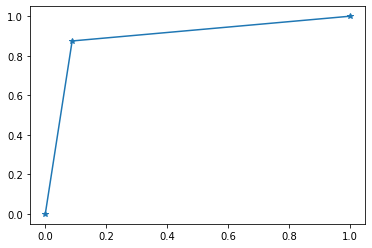

[0.         0.08823529 1.        ]
[0.    0.875 1.   ]
[2 1 0]


In [23]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr, marker='*')
plt.show()

print(fpr)
print(tpr)
print(thresholds)